In [3]:
#parsisng XML
from lxml import objectify
import pandas as pd
from distutils import util
xml = objectify.parse(open('XMLData.xml'))
root = xml.getroot()
df = pd.DataFrame(columns=('Number', 'Boolean'))
for i in range(0,4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'Boolean'],[obj[0].pyval,bool(util.strtobool(obj[2].text))]))#Obtaining a numeric value from the <Number> element consists of using the
#pyval output, rather than the text output, BOOLEAN convert the string to a numeric value using the strtobool
    row_s = pd.Series(row)
    row_s.name = obj[1].text
    df = df.append(row_s)
print ((df.ix['First']['Number']))
print ((df.ix['First']['Boolean']))

First    1
First    1
First    1
Name: Number, dtype: object
First    True
First    True
First    True
Name: Boolean, dtype: object


C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [16]:
#XPath for data extraction - XPath to extract data from your dataset can greatly 
#reduce the complexity of your code and potentially make it faster as well


from lxml import objectify
import pandas as pd
from distutils import util
xml = objectify.parse(open('XMLData.xml'))
root = xml.getroot()
data = zip(map(int, root.xpath('Record/Number')),map(bool, map(util.strtobool,map(str, root.xpath('Record/Boolean')))))
df = pd.DataFrame(list(data),columns=('Number', 'Boolean'),index=list(map(str,root.xpath('Record/String'))))
print (df)
print (df.ix['First']['Number'])
print (df.ix['First']['Boolean'])

        Number  Boolean
First        1     True
First        1     True
First        1     True
Second       2     True
Second       2     True
Third        3     True
First    1
First    1
First    1
Name: Number, dtype: int64
First    True
First    True
First    True
Name: Boolean, dtype: bool


C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [17]:
#unicode type
import sys
sys.getdefaultencoding()

'utf-8'

In [26]:
#raw text
# stemming and removing stop words ( a, as, the, that, so)
#import nltk
#nltk.download('punkt')
import sklearn.feature_extraction.text as ext
from nltk import word_tokenize
from nltk import punkt
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
        return stemmed
def tokenize(text):
    tokens = word_tokenize(text)
    print (tokens)
    stems = stem_tokens(tokens, stemmer)
    print (stems)
    return stems
vocab = ['Sam loves swimming so he swims all the time']
vect = ext.CountVectorizer(tokenizer=tokenize,stop_words='english')
vec = vect.fit(vocab)
sentence1 = vec.transform(['George loves swimming too!'])
print (vec.get_feature_names())
print (sentence1.toarray())


['thereupon']
['thereupon']
['noone']
['noon']
['why']
['whi']
['that']
['that']
['and']
['and']
['anything']
['anyth']
['indeed']
['inde']
['ours']
['our']
['elsewhere']
['elsewher']
['at']
['at']
['such']
['such']
['see']
['see']
['third']
['third']
['ever']
['ever']
['mine']
['mine']
['both']
['both']
['front']
['front']
['as']
['as']
['a']
['a']
['fifty']
['fifti']
['me']
['me']
['yet']
['yet']
['do']
['do']
['was']
['wa']
['behind']
['behind']
['another']
['anoth']
['bill']
['bill']
['whereupon']
['whereupon']
['name']
['name']
['some']
['some']
['may']
['may']
['hers']
['her']
['by']
['by']
['thereby']
['therebi']
['cant']
['cant']
['now']
['now']
['yourselves']
['yourselv']
['during']
['dure']
['last']
['last']
['many']
['mani']
['myself']
['myself']
['other']
['other']
['along']
['along']
['thru']
['thru']
['than']
['than']
['ie']
['ie']
['sincere']
['sincer']
['anyway']
['anyway']
['whither']
['whither']
['somehow']
['somehow']
['up']
['up']
['an']
['an']
['eight']
['eight']
[

In [28]:
import re
data1 = 'My phone number is: 800‐555‐1212.'
data2 = '800‐555‐1234 is my phone number.'
pattern = re.compile(r'(\d{3})‐(\d{3})‐(\d{4})')
dmatch1 = pattern.search(data1).groups()
dmatch2 = pattern.search(data2).groups()
print (dmatch1)
print (dmatch2)

('800', '555', '1212')
('800', '555', '1234')


In [30]:
#bag of words
from sklearn.datasets import fetch_20newsgroups
import sklearn.feature_extraction.text as ext
categories = ['comp.graphics', 'misc.forsale','rec.autos', 'sci.space']
twenty_train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=42)
count_vect = ext.CountVectorizer()
X_train_counts = count_vect.fit_transform(
twenty_train.data)
print (X_train_counts.shape)

(2356, 34750)


In [31]:
#n-grams - continuous sequence of items in the text you want to analyze. 
#The items are phonemes, syllables, letters, words, or base pairs
from sklearn.datasets import fetch_20newsgroups
import sklearn.feature_extraction.text as ext
categories = ['sci.space']
twenty_train = fetch_20newsgroups(subset='train',
categories=categories,
remove=('headers', 'footers', 'quotes'),
shuffle=True,
random_state=42)
count_chars = ext.CountVectorizer(analyzer='char_wb',
ngram_range=(3,3),
max_features=10).fit(twenty_train['data'])
count_words = ext.CountVectorizer(analyzer='word',
ngram_range=(2,2),
max_features=10,
stop_words='english').fit(twenty_train['data'])
X = count_chars.transform(twenty_train.data)
print (count_words.get_feature_names())
print (X[1].todense())
print (count_words.get_feature_names())

['anonymous ftp', 'commercial space', 'gamma ray', 'nasa gov', 'national space', 'remote sensing', 'sci space', 'space shuttle', 'space station', 'washington dc']
[[0 0 2 5 1 4 2 2 0 5]]
['anonymous ftp', 'commercial space', 'gamma ray', 'nasa gov', 'national space', 'remote sensing', 'sci space', 'space shuttle', 'space station', 'washington dc']


In [32]:
#tf-idf transformations -  compensate for the lengths of different documents
from sklearn.datasets import fetch_20newsgroups
import sklearn.feature_extraction.text as ext
categories = ['sci.space']
twenty_train = fetch_20newsgroups(subset='train',
categories=categories,
remove=('headers', 'footers', 'quotes'),shuffle=True,random_state=42)
count_vect = ext.CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
tfidf = ext.TfidfTransformer().fit(X_train_counts)
X_train_tfidf = tfidf.transform(X_train_counts)
print (X_train_tfidf.shape)

(593, 13564)


In [33]:
#graph data -networkX basics
import networkx as nx
G = nx.cycle_graph(10)
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


In [34]:
import matplotlib.pyplot as plt
nx.draw_networkx(G)
plt.show()

C:\Users\camil\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

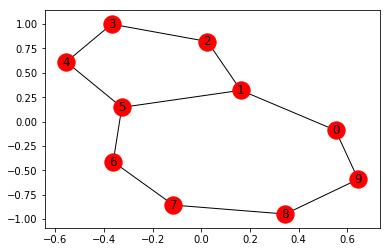

In [35]:
G.add_edge(1,5)
nx.draw_networkx(G)
plt.show()